In [2]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [3]:
import healpy as hp
from matplotlib.collections import PolyCollection
nside=32
npix = hp.nside2npix(32)
#boundaries = hp.boundaries(nside,arange(npix))

def plot_hpix(hmap,counts,plttitle,cax,ax,cmapname,hidezalabels=False,thefontsize=14,contourcolor=[0,0,0]):
    boundaries = hp.boundaries(nside,arange(npix),nest=False)

    g = counts>0
    verts = swapaxes(boundaries[g,0:2,:],1,2)[:,:,::-1]
    coll = PolyCollection(verts, array=hmap[g], cmap=plt.get_cmap(cmapname), edgecolors='none',clim=cax,rasterized=True)
    ax.add_collection(coll)
    #ax.autoscale_view()
    fig.colorbar(coll, ax=ax)
    ax.set_title(plttitle)
    ax.set_axis_bgcolor('white')

    for radius_deg in [20,40,60,80]:
        r=sin(radius_deg*pi/180.)
        x = linspace(-r,r,100)
        #zacontourcolor=array([1.,1.,1.])*.75
        ax.plot(x,sqrt(r**2-x**2),'--',linewidth=2,color=contourcolor)
        ax.plot(x,-sqrt(r**2-x**2),'--',linewidth=2,color=contourcolor)
        if hidezalabels!=True:
            ax.text(-.07,-r-.05, str(radius_deg)+r'$^O$', fontsize=thefontsize,backgroundcolor='white')

    ax.set_frame_on(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
def plot_slice():
    return

## null experiments

In [4]:
d = '/Users/abrahamn/Documents/MIT/21cm/hera/2015/jul13/unpolarized_beam_analysis_hera/'
null1 = genfromtxt(d+'null1_north_over_south_ratio_ew_ns.csv',delimiter=',')
null4 = genfromtxt(d+'null4_north_over_south_ratio_ew_ns.csv',delimiter=',')

/Library/Python/2.7/site-packages/matplotlib-1.4.3-py2.7-macosx-10.10-intel.egg/matplotlib/colors.py:584: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)
/Library/Python/2.7/site-packages/matplotlib-1.4.3-py2.7-macosx-10.10-intel.egg/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


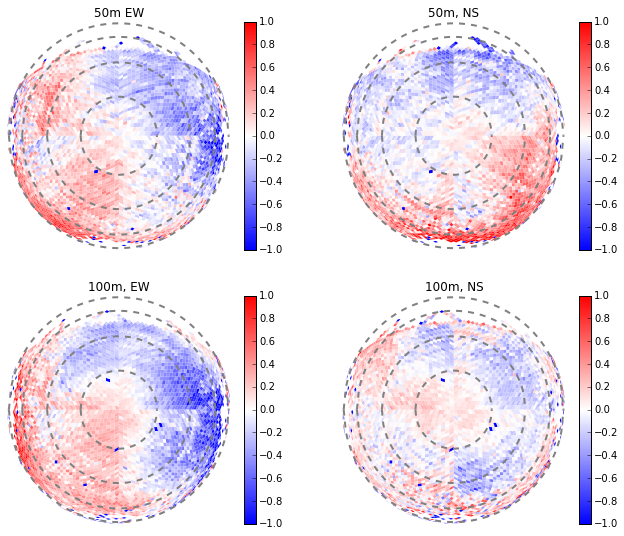

In [5]:
fig, gridax = plt.subplots(2,2)
fig.set_size_inches((11,9))

cax=[-1,1]
cm = 'bwr'
zacontourcolor = array([0,0,0])+.5
plot_hpix(null1[:,0],null1[:,2],'50m EW',cax,gridax[0,0],cm,hidezalabels=True,contourcolor=zacontourcolor)
plot_hpix(null1[:,1],null1[:,2],'50m, NS',cax,gridax[0,1],cm,hidezalabels=True,contourcolor=zacontourcolor)
plot_hpix(null4[:,0],null4[:,2],'100m, EW',cax,gridax[1,0],cm,hidezalabels=True,contourcolor=zacontourcolor)
plot_hpix(null4[:,1],null4[:,2],'100m, NS',cax,gridax[1,1],cm,hidezalabels=True,contourcolor=zacontourcolor)

## dish experiments

In [7]:
d = '/Users/abrahamn/Documents/MIT/21cm/hera/2015/jul13/unpolarized_beam_analysis_hera/'
dish2 = genfromtxt(d+'dish2_nside32_ew_ns.csv',delimiter=',')
dish2[isnan(dish2)] = 0
dish1 = genfromtxt(d+'dish1_nside32_ew_ns.csv',delimiter=',')
dish1[isnan(dish1)] = 0
dish4 = genfromtxt(d+'dish4_nside32_ew_ns.csv',delimiter=',')
dish4[isnan(dish4)] = 0

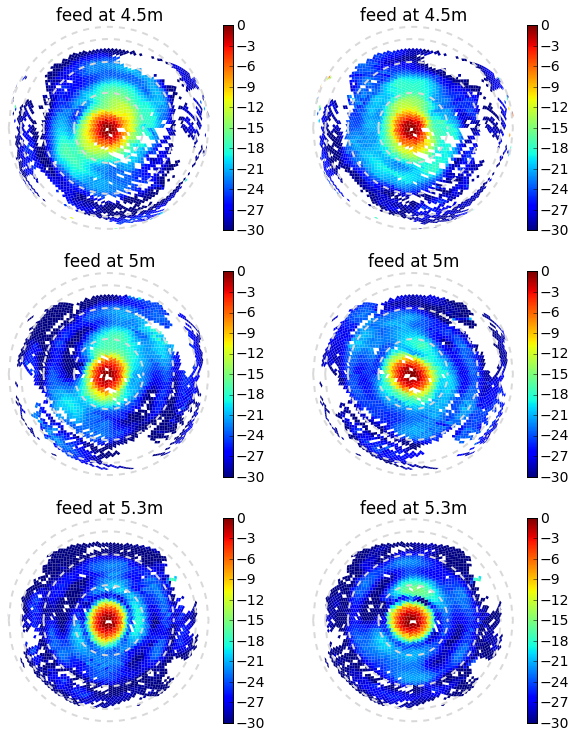

In [32]:
fig, gridax = plt.subplots(3,2)
fig.set_size_inches((10,12.5))

cax=[-30,0]
cm = 'jet'
zacontourcolor = array([0,0,0])+.85

matplotlib.rcParams.update({'font.size': 14})

plot_hpix(dish1[:,0],dish1[:,0]!=0,'feed at 4.5m',cax,gridax[0,0],cm,hidezalabels=True,contourcolor=zacontourcolor)
plot_hpix(dish1[:,1],dish1[:,1]!=0,'feed at 4.5m',cax,gridax[0,1],cm,hidezalabels=True,contourcolor=zacontourcolor)
plot_hpix(dish2[:,0],dish2[:,0]!=0,'feed at 5m',cax,gridax[1,0],cm,hidezalabels=True,contourcolor=zacontourcolor)
plot_hpix(dish2[:,1],dish2[:,1]!=0,'feed at 5m',cax,gridax[1,1],cm,hidezalabels=True,contourcolor=zacontourcolor)
plot_hpix(dish4[:,0],dish4[:,0]!=0,'feed at 5.3m',cax,gridax[2,0],cm,hidezalabels=True,contourcolor=zacontourcolor)
plot_hpix(dish4[:,1],dish4[:,1]!=0,'feed at 5.3m',cax,gridax[2,1],cm,hidezalabels=True,contourcolor=zacontourcolor)

In [29]:
# maybe make azimuthally averaged slice plots?

za,az = hp.pix2ang(nside,arange(npix))
r=.02
g = logical_and(abs(sin(za)*cos(az))<r,sin(az)>0,za<pi/2)
g2 = logical_and(abs(sin(za)*sin(az))<r,cos(az)>0,za<pi/2)
g_neg = logical_and(abs(sin(za)*cos(az))<r,sin(az)<0,za<pi/2)
g2_neg = logical_and(abs(sin(za)*sin(az))<r,cos(az)<0,za<pi/2)

def plot_slice(hmap,counts,gax,polstr,addylabel=False,addxlabel=False,plottitle=''):
    if polstr=='ew':
        col1='r' # H
        col2='b' # E
    elif polstr=='ns':
        col1='b' # E
        col2='r' # H
    gax.plot(180./pi*za[g*counts],hmap[g*counts],'.'+col1)
    gax.plot(-180./pi*za[g_neg*counts],hmap[g_neg*counts],'.'+col1)
    gax.plot(180./pi*za[g2*counts],hmap[g2*counts],'.'+col2)
    gax.plot(-180./pi*za[g2_neg*counts],hmap[g2_neg*counts],'.'+col2)
    gax.set_title(plottitle)
    if addylabel: gax.set_ylabel('dB')
    gax.set_ylim([-35,0])
    gax.set_xlim([-60,60])
    gax.grid()
    if addxlabel: gax.set_xlabel('zenith angle (deg)')

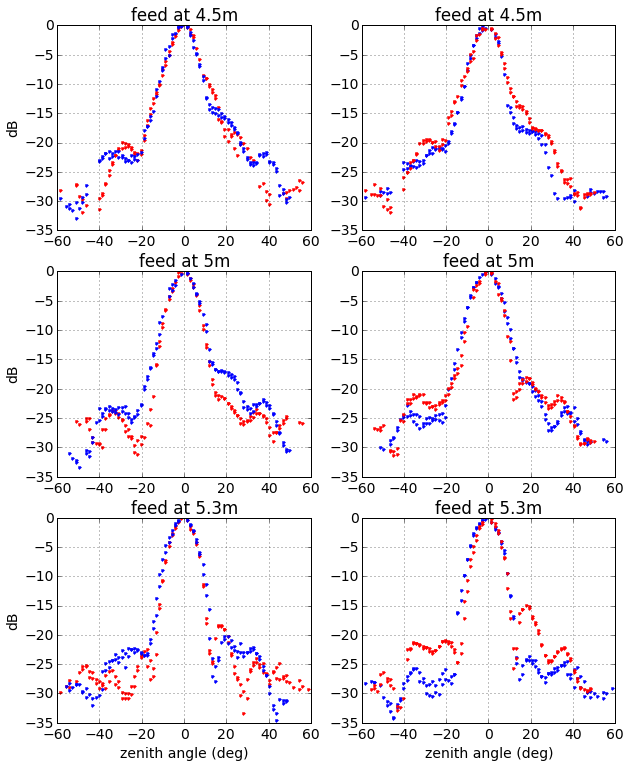

In [30]:
matplotlib.rcParams.update({'font.size': 14})
fig, gridax = plt.subplots(3,2)
fig.set_size_inches((10,12.5))

plot_slice(dish1[:,0],dish1[:,0]!=0,gridax[0,0],'ew',addylabel=True,plottitle='feed at 4.5m')
plot_slice(dish1[:,1],dish1[:,1]!=0,gridax[0,1],'ns',plottitle='feed at 4.5m')
plot_slice(dish2[:,0],dish2[:,0]!=0,gridax[1,0],'ew',addylabel=True,plottitle='feed at 5m')
plot_slice(dish2[:,1],dish2[:,1]!=0,gridax[1,1],'ns',plottitle='feed at 5m')
plot_slice(dish4[:,0],dish4[:,0]!=0,gridax[2,0],'ew',addxlabel=True,addylabel=True,plottitle='feed at 5.3m')
plot_slice(dish4[:,1],dish4[:,1]!=0,gridax[2,1],'ns',addxlabel=True,plottitle='feed at 5.3m')